책 *김성진,코딩셰프의 3분 딥러닝 케라스맛,한빛미디어,2018*을 읽고 책에서 사용된 코드를 재구성했습니다.

# 인공신경망 원리

## 인공신경망 개념

뉴런 구조를 인공적으로 구현해 계층을 형성하는 방법입니다.

## 인공신경망 구조

입력 계층, 은닉계층, 출력 계층으로 구성

## 인공신경망 활용
분류와 회귀에 모두 사용이 가능합니다.
- 분류문제에서는 손실 함수로 교차 엔트로피 함수를 주로 사용합니다.
- 주로 MSE를 손실 함수로 사용합니다.

### 오차역전파(error back propagation)
- 경사하강법: 
- Adam: 경사의 분산과 평균으로부터 변수를 조절하는 알고리즘
- Adagrad: 밀집되지 않은 데이터에 적합하도록 경사 제곱을 통해 시간에 따라 학습률을 조절하는 알고리즘
- RMSprop: 학습률이 급격히 떨어지지 않게 감쇠 항을 추가한 알고리즘

# 인공신경망으로 분류문제 풀기

In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils # categorical 데이터로 변환하기 위함

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')


# X_train /= 255
# X_test /= 255

Using TensorFlow backend.


In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 784)

In [4]:
# batch_size = 128
# nr_classes = 10
# nr_iterations = 20

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

이렇게 전환해 인공신경망을 이용한 분류작업시 정수보다 이진 벡터로 출력 변수를 구성하는 것이 효율적입니다.

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X_train, y_train,
                    batch_size = 100, epochs = 15,
                    verbose = 1, validation_split= 0.2)
score = model.evaluate(X_test, y_test, verbose = 0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 50us/step - loss: 0.3870 - acc: 0.8924 - val_loss: 0.2138 - val_acc: 0.9406
Epoch 2/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.1844 - acc: 0.9475 - val_loss: 0.1582 - val_acc: 0.9580
Epoch 3/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.1386 - acc: 0.9599 - val_loss: 0.1384 - val_acc: 0.9597
Epoch 4/15
48000/48000 [==============================] - 2s 42us/step - loss: 0.1091 - acc: 0.9685 - val_loss: 0.1194 - val_acc: 0.9646
Epoch 5/15
48000/48000 [==============================] - 2s 42us/step - loss: 0.0889 - acc: 0.9744 - val_loss: 0.1077 - val_acc: 0.9681
Epoch 6/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.0737 - acc: 0.9788 - val_loss: 0.1100 - val_acc: 0.9678
Epoch 7/15
48000/48000 [==============================] - 2s 42us/step - loss: 0.0630 - acc: 0.9818 - val_loss: 0.0949 - val_acc

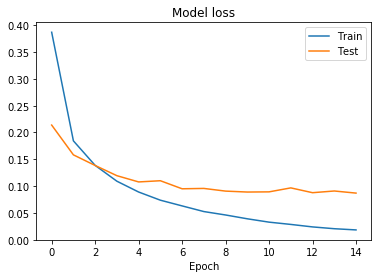

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

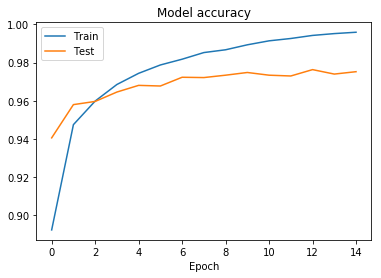

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

# 인공신경망으로 회귀 문제 풀기

In [9]:
from keras import datasets
from sklearn.preprocessing import MinMaxScaler

(X_train, y_train),(X_test, y_test) = datasets.boston_housing.load_data()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train.shape

(404, 13)

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='SGD')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,
                    batch_size = 100, epochs = 100,
                    verbose = 0, validation_split= 0.2)
score = model.evaluate(X_test, y_test, batch_size=100,verbose = 1)

102/102 [==============================] - 0s 31us/step


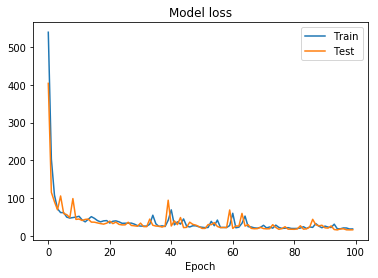

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

In [14]:
score

22.318215463675706

지금까지 인공신경망의 기본 개념과 케라스를 이용해 구현하는 방법을 알아보았ㅅㅂ니다.
은닉 계층이 하나인 경우를 다루었습니다. 앞으로는 더 많은 은닉 계층과 다른 평태의 은닉계층을 활용해 더 높은 정확도를 달성해보도록 하겠습니다.

# 케라스로 심층신경망(DNN)

MNIST 데이터셋을 동일하게 이용하지만, 이번에는 은닉계층을 4단계로 늘인 DNN을 구현하겠습니다.


In [15]:
from keras import datasets
from keras.utils import np_utils # categorical 데이터로 변환하기 위함

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 784)

In [16]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape

(60000, 10)

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,), name='Hidden-1'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu', name='Hidden-2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Hidden-2 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


`Dropout()`은 일정한 확률로 출력노드의 신호를 제거해 신경망이 더 견고하게 학습하도록 합니다.

In [18]:
history = model.fit(X_train, y_train,
                    batch_size = 100, epochs = 15,
                    verbose = 1, validation_split= 0.2)
score = model.evaluate(X_test, y_test, verbose = 0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 55us/step - loss: 0.5354 - acc: 0.8379 - val_loss: 0.1973 - val_acc: 0.9417
Epoch 2/15
48000/48000 [==============================] - 2s 52us/step - loss: 0.2420 - acc: 0.9290 - val_loss: 0.1435 - val_acc: 0.9597
Epoch 3/15
48000/48000 [==============================] - 3s 53us/step - loss: 0.1867 - acc: 0.9445 - val_loss: 0.1234 - val_acc: 0.9634
Epoch 4/15
48000/48000 [==============================] - 2s 51us/step - loss: 0.1562 - acc: 0.9539 - val_loss: 0.1173 - val_acc: 0.9639
Epoch 5/15
48000/48000 [==============================] - 2s 52us/step - loss: 0.1388 - acc: 0.9576 - val_loss: 0.1075 - val_acc: 0.9679
Epoch 6/15
48000/48000 [==============================] - 3s 53us/step - loss: 0.1207 - acc: 0.9626 - val_loss: 0.0984 - val_acc: 0.9724
Epoch 7/15
48000/48000 [==============================] - 3s 53us/step - loss: 0.1111 - acc: 0.9667 - val_loss: 0.0952 - val_acc

DNN은 일반 인공신경망 보다 더 깊은 신경망이기 때문에 더 좋은 성능을 내지만 MNIST데이터는 비교적 간단해 성능차이가 거의 없습니다. 

# 케라스로 구현하는 합성곱신경망(CNN)
합성곱신경망은 주로 영상처리에 많이 사용되는 기술입니다. 

## 데이터 준비
CNN은 DNN에서의 데이터 준비과정과 두가지가 다릅니다.
1. 이미지를 벡터화하지 않고 그대로 사용
2. 흑백 이미지는 추가적인 채널정보를 포함해야 합니다.


In [27]:
from keras import datasets
from keras.utils import np_utils # categorical 데이터로 변환하기 위함

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
img_rows, img_cols = X_train.shape[1:] # 채널 정보를 추가하기 위해
# X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
# X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
# input_shape = (1, img_rows, img_cols)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape=(img_cols, img_rows, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(60000, 28, 28, 1)

In [28]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape

(60000, 10)

In [34]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [35]:
history = model.fit(X_train, y_train,
                    batch_size = 100, epochs = 10,
                    verbose = 1, validation_split= 0.2)
score = model.evaluate(X_test, y_test, verbose = 0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 42s 872us/step - loss: 0.2522 - acc: 0.9238 - val_loss: 0.0617 - val_acc: 0.9825
Epoch 2/10
48000/48000 [==============================] - 41s 845us/step - loss: 0.0914 - acc: 0.9720 - val_loss: 0.0519 - val_acc: 0.9842
Epoch 3/10
48000/48000 [==============================] - 41s 855us/step - loss: 0.0687 - acc: 0.9792 - val_loss: 0.0397 - val_acc: 0.9879
Epoch 4/10
48000/48000 [==============================] - 41s 857us/step - loss: 0.0545 - acc: 0.9835 - val_loss: 0.0405 - val_acc: 0.9878
Epoch 5/10
48000/48000 [==============================] - 42s 874us/step - loss: 0.0452 - acc: 0.9857 - val_loss: 0.0406 - val_acc: 0.9873
Epoch 6/10
48000/48000 [==============================] - 42s 877us/step - loss: 0.0416 - acc: 0.9868 - val_loss: 0.0363 - val_acc: 0.9896
Epoch 7/10
48000/48000 [==============================] - 41s 864us/step - loss: 0.0339 - acc: 0.9893 - val_loss: 0.

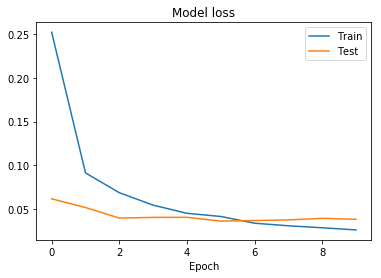

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

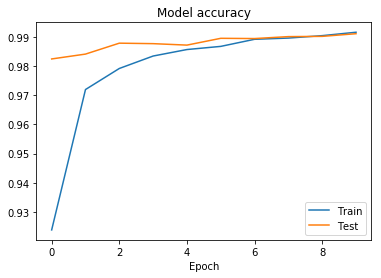

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

케라스로 CNN을 구현하는 방법을 알아봤습니다. CNN은 합성곱 계층을 이용해 적은 가중치로 높은 성능을 냅니다. 가중치가 적기때문에 오버피팅의 문제도 낮습니다.

# 케라스로 구현하는 순환신경망(RNN)
순환신경망은 시계열 데이터 처리에 강점이 있는 인공신경망입니다. 순환신경망에서도 가장 많이 사용되는 LSTM(Long term shor term memory)를 다뤄 보겠습니다.

## LSTM

사용할 데이터셋은 영화 평점을 다루는 IMDB입니다.


In [2]:
from keras.preprocessing import sequence
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000) # 최대 단어의 빈도를 20000으로 제한했습니다.
X_train = sequence.pad_sequences(X_train, maxlen=80)
X_test = sequence.pad_sequences(X_test, maxlen=80)


17465344/17464789 [==============================] - 21s 1us/step


In [13]:
# LSTM and CNN for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb

# fix random seed for reproducibility
numpy.random.seed(42)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_train.shape

(25000, 500)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Final evaluation of the model
history = model.fit(X_train, y_train,
                    batch_size = 32, epochs = 10,
                    verbose = 1, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 47s 2ms/step - loss: 0.1373 - acc: 0.9530 - val_loss: 0.3076 - val_acc: 0.8854
Epoch 2/10
25000/25000 [==============================] - 46s 2ms/step - loss: 0.1274 - acc: 0.9567 - val_loss: 0.3081 - val_acc: 0.8859
Epoch 3/10
25000/25000 [==============================] - 46s 2ms/step - loss: 0.1226 - acc: 0.9589 - val_loss: 0.3151 - val_acc: 0.8852
Epoch 4/10
25000/25000 [==============================] - 45s 2ms/step - loss: 0.1175 - acc: 0.9626 - val_loss: 0.3239 - val_acc: 0.8844
Epoch 5/10
25000/25000 [==============================] - 46s 2ms/step - loss: 0.1120 - acc: 0.9645 - val_loss: 0.3233 - val_acc: 0.8842
Epoch 6/10
25000/25000 [==============================] - 46s 2ms/step - loss: 0.1088 - acc: 0.9656 - val_loss: 0.3402 - val_acc: 0.8834
Epoch 7/10
25000/25000 [==============================] - 46s 2ms/step - loss: 0.1034 - acc: 0.9686 - val_loss: 0.3516 - val_acc

In [20]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.99%


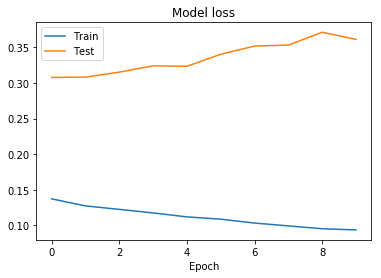

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

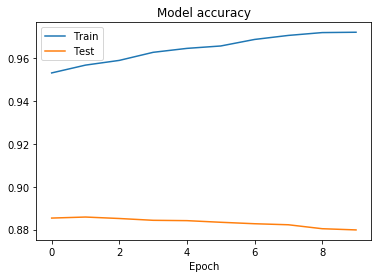

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

# 케라스로 구현하는 오토인코더(AE)
오토인코더는 비지도 학습의 예시입니다. 비지도학습은 입력 데이터를 가공해서 목표값을 출력하는 방식이 아니라 레이블 정보가 없는 데이터 특성을 분석하거나 추출합니다.  
오토인코더의 목적은 입력 데이터의 특징점을 효율적으로 찾는 겁니다.  주로 활용되는 곳은 데이터 압축, 잡음 억제등입니다. 주성분분석(PCA)으로 처리하는 일차원 데이터 처리방식을 딥러닝 방식으로 확장한 것입니다. 

## MNIST데이터를 이용해 오토인코더 구현

In [24]:
from keras import datasets
from keras.utils import np_utils # categorical 데이터로 변환하기 위함

(X_train, _), (X_test, _) = datasets.mnist.load_data() # AE에서는 레이블 정보가 필요하지 않음
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))
X_train.shape

(60000, 784)

In [ ]:
# Final evaluation of the model
history = model.fit(X_train, y_train,
                    batch_size = 64, epochs = 3,
                    verbose = 1, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
 8320/25000 [========>.....................] - ETA: 1:21 - loss: 0.6531 - acc: 0.6174

In [25]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = autoencoder.fit(X_train, X_train,
                    epochs=10,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.1040 - val_loss: 0.1009
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1016 - val_loss: 0.0990
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1000 - val_loss: 0.0978
Epoch 4/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0989 - val_loss: 0.0967
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0980 - val_loss: 0.0960
Epoch 6/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0973 - val_loss: 0.0955
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0968 - val_loss: 0.0951
Epoch 8/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0964 - val_loss: 0.0947
Epoch 9/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0961 - val_loss: 0.0

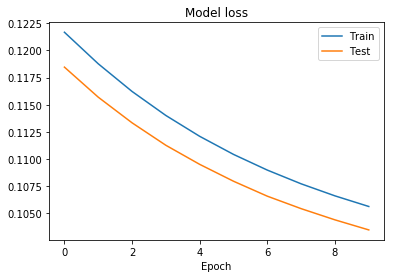

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])

In [33]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

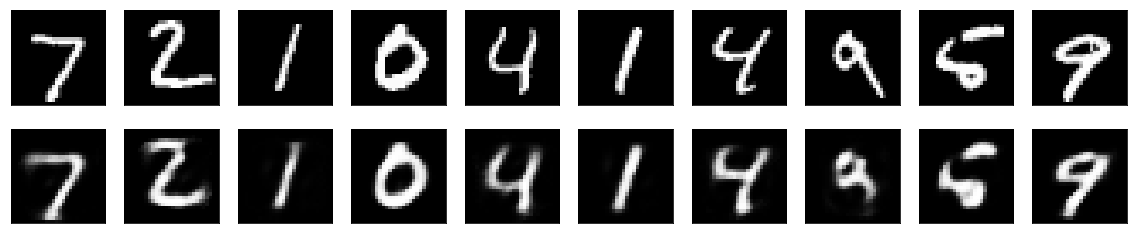

In [34]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# 케라스로 구현하는 생성적 적대 신경망(GAN)

생성적 적대 신경망(GAN; Generative Adverasrial Nework)은 경쟁해서 최적화를 수행하는 생성현 신경망입니다. GAN 내부의 두 신경망이 상호 경쟁하면서 학습합니다. 
두 신경망 중의 하나는 생성망이고 다른 하나는 판별망입니다.
생성형 인공지능 방식으로 실제 데이터와 비슷한 확률분포를 가지는 허구 데이터를 생성합니다. 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras import datasets

def load_data():
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)
    return X_train

# Building the generator

In [ ]:
from keras import models
from keras.layers import Dense, Conv2D, Reshape, Flatten, Lambda
from keras.optimizers import Adam

def build_generator(noise_shape=(100,)):
    input = Input(noise_shape)
    x = Dense(128 * 7 * 7, activation="relu")(input)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)
    model = Model(input, out)
    print("-- Generator -- ")
    model.summary()
    return model

# Building the discriminator

In [ ]:
def build_discriminator(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(input, out)
    print("-- Discriminator -- ")
    model.summary()
    return model